# Data creation with Youtube API

In [1]:
# Tutorial from - Thu Vu Data Analytics: https://www.youtube.com/watch?v=D56_Cx36oGY&t=767s 

import isodate

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from dateutil import parser

sns.set(style="darkgrid", color_codes=True)

# Google API
from googleapiclient.discovery import build
from IPython.display import JSON  # - use with Jupenter labs

In [2]:
# NLP libraries - For wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Valerie
[nltk_data]     Madojemu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Valerie
[nltk_data]     Madojemu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Get Channel Statisitcs

In [3]:
api_key = "##############################"

channel_ids = [  'UCQRKZIhygTNRPTEmbWQ7LXg', 
               # Jellyman Education - Tableau Specific
               
               'UCQIMjZigvDj6tWFoMTsN5_g', 
               # @penguinanalytics1889 - Tableau Specific
               
               'UC7cs8q-gJRlGwj4A8OmCmXg', 
               # @Alex The Anlayst - General DA With Some tableau
               
               'UCDybamfye5An6p-j1t2YMsg', 
               # @datawithmo - General DA with Some Tableau
               
               'UCuDF09RGFE3V3lY77Z_cA9g', 
               # @OtherLevels - Dashboards with Microsoft Office Products
               
               "UCWDop3GkezozsmVWS7-ACpw",  
               # @DataVizCanvas - Tableau Specific
               
               'UCTlX7UpqASrldmx5_CpG3CA', 
               # @vizwiz - Tableau Specific
               
               'UCAEgip72UcvYwjcqzcJ1I2g', 
               # @DataScienceRoadMap - Tableau & Power Bi with General DA
               
               "UCBOs6624oqScw8PaU-Jzw9A",
               # @datatutorials1 - Tableau & Power BI Dashboards with some General DA
               
               "UCKue1hlnftshmdYQYE5qRcw",
               # @yourownkpi - Power BI Dashboards
               
                "UCdXTfbW26jVkQzqjsRO6JOg",
               # @VizualIntelligenceInc - Tableau Specific
               
                "UCkr5oRDSZVQKP_LeuZS4KPw",
               # @DataWizardry - Tableau, Python & SQL
               
               "UCPpvOgDkPktWQUk6g6Thiug",
               # @techianshi - Tableau Specific
               
               "UC7HYxRWmaNlJux-X7rNLZyw",
               # @TableauTim - Tableau Tutorials
               
               "UCJQJAI7IjbLcpsjWdSzYz0Q",
               # @Thuvu5 - General DA
               
               "UCChmJrVa8kDg05JfCmxpLRw",
               # @DarshilParmar - General DE & Solution Architect
               
               "UC_B0oWPRDqkXqDJkMBv6jkA",
               # @LeanExcelSolutions - Excel & Power BI
               
               "UCLLw7jmFsvfIVaUFsLs8mlQ",
               # @LukeBarousse - Tableau & General DA
               
               "UCxNzLV0gP8nuOZcSfyc0hsg",
               # @AbhishekAgarrwal - Qlik, Tableau, Power BI & General DA
               
                "UCW2E1sGBVde5WMMxEh5CW4w",
               # @sqlbelle - Tableau, SQL & General DA
               
               "UCk5tiFqPvdjsl7yT4mmokmg",
               # @RVideoTutorials - Tableau, Power BI & General DA
               
               "UCtoNXlIegvxkvf5Ji8S57Ag",
               # @loresowhat - Tableau & General DA
               
               # "UC-3e3hAUhDV2lwcoQGD2grg", - Obmitting as will easilty cross daily limit
               # # @SimonSezIT - Tableau & General DA - little focus on Tableau
               
               # "UCCktnahuRFYIBtNnKT5IYyg", - Obmitting as will easilty cross daily limit
               # # @Intellipaat - Tableau & General DA - Almost 4K Videos!! - little focus on Tableau
               
               "UC2hH4_fxlmwHz4KzwA-b2bg",
               # @techtalkwithniket - Tableau
               
               "UCeVvf7FHBK-vGKTp_AiCbhg",
               # @onenumbertableau - Tableau
               
               "UCer-TzTTxTiIi3C1Vp0aNQw",
               # @TechiRahul - Tableau, Power BI & SQL
               
               "UC2vSMiWpTIw1sRD6C_6GgOg",
               # @generaanalytics5326 - Tableau
               
               "UCsCY2ZNdodzsI6SX6UDkgCA",
               # @GauravSahani14 - Tableau, Power BI & General GA
               
               # "UCkw4JCwteGrDHIsyIIKo4tQ", Obmitting as will easilty cross daily limit
               # @edurekaIN - Tableau & General DA - Almost 10K Videos! - little focus on Tableau
               
               "UCh9nVJoWXmFb7sLApWGcLPQ",
               # @codebasics - General DA
               
               "UCr9pRlsueSAVJIFmMntRv0A",
               # @ynteractivetraining - Tableau & Power BI
               
               # "UCNGIDQ466bNY87eEeKeQuzA", Obmitting as will easilty cross daily limit
               # # @360DigiTMG - Tableau & General DA - - little focus on Tableau
               
               "UCKVD6dw0hfgFHb1_m8tnvFw",
               # @mergeyourdata - Tableau & General DA
               
               "UCEg8IaqSvjzQ7Sd1ZH267dg",
               # @AnalyticsExplorers - Tableau, MySQL, Excel and Power BI
               
               "UCzr3JwUsTV9gQ_q1RIykHBA",
               # @AppsforTableau - Tableau
               
               "UC3rY5HOgbBvGmq7RnDfwF7A",
               # @RishabhMishraOfficial - Tableau (1 Video), Power BI & General Analytics
               
               # "UCObs0kLIrDjX2LLSybqNaEA", - Obmitting as will easilty cross daily limit
               # # @greatlearning - Tableau & General Analytics - Almost 2K videos - little focus on Tableau
               
               "UC5fs7PookxGfDPTo-RU0ReQ",
               # @PavanLalwani - Tableau, Power BI & General Analytics
               
               "UC5KQSLxuu1MkXjlwcucAWsg",
               # @theinformationlab - Tableau & General Analytics

                "UCYCYUcVtiueIYWZmUy8TSiQ",
               # @Data Coach - Tableau & Alteryx
               
               
               
               

               
               
               
               
               
]
youtube = build("youtube", "v3", developerKey=api_key)

In [4]:
def get_channel_stats(youtube, channel_ids):
    """
    Get channel statistics: title, subscriber count, view count, video count, upload playlist
    Params:

    youtube: the build object from googleapiclient.discovery
    channels_ids: list of channel IDs

    Returns:
    Dataframe containing the channel statistics for all channels in the provided list: title, subscriber count, view count, video count, upload playlist

    """
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics", id=",".join(channel_ids)
    )
    response = request.execute()

    # Use JSON formatter to get what you want

    for i in range(len(response["items"])):
        data = dict(
            channelName=response["items"][i]["snippet"]["title"],
            subscribers=response["items"][i]["statistics"]["subscriberCount"],
            views=response["items"][i]["statistics"]["viewCount"],
            totalVideos=response["items"][i]["statistics"]["videoCount"],
            playlistId=response["items"][i]["contentDetails"]["relatedPlaylists"][
                "uploads"
            ],
        )

        all_data.append(data)

    return pd.DataFrame(all_data)

# Now I can print out the data and take a look at the channel statistics overview.
# Using the get_channel_stats function defined below, now we are going to obtain the channel statistics for the channels in scope.

In [5]:
channel_data = get_channel_stats(youtube, channel_ids)

In [6]:
channel_data

,channelName,subscribers,views,totalVideos,playlistId
0,Data Coach,3550,294333,142,UUYCYUcVtiueIYWZmUy8TSiQ
1,Techi Anshi,2110,96756,50,UUPpvOgDkPktWQUk6g6Thiug
2,Penguin Analytics,32300,3806969,81,UUQIMjZigvDj6tWFoMTsN5_g
3,DataScience RoadMap,13300,524075,184,UUAEgip72UcvYwjcqzcJ1I2g
4,Abhishek Agarrwal,62300,10954570,1391,UUxNzLV0gP8nuOZcSfyc0hsg
5,Xpressurdata,7720,735459,333,UUer-TzTTxTiIi3C1Vp0aNQw
6,Alex The Analyst,620000,26105161,260,UU7cs8q-gJRlGwj4A8OmCmXg
7,GenerA Analytics,893,58089,17,UU2vSMiWpTIw1sRD6C_6GgOg
8,Lore So What,17200,781708,88,UUtoNXlIegvxkvf5Ji8S57Ag
9,Data With Mo,68500,2029087,62,UUDybamfye5An6p-j1t2YMsg


# CHANNEL INFORMATION -  CSV EXPORT HERE

In [7]:
channel_data.to_csv("Tableau_Channel_AL.csv")

In [8]:
def get_video_ids(youtube, playlist_id):
    """
    Get list of video IDs of all videos in the given playlist
    Params:

    youtube: the build object from googleapiclient.discovery
    playlist_id: playlist ID of the channel

    Returns:
    List of video IDs of all videos in the playlist

    """

    request = youtube.playlistItems().list(
        part="contentDetails", playlistId=playlist_id, maxResults=50
    )
    response = request.execute()

    video_ids = []

    for i in range(len(response["items"])):
        video_ids.append(response["items"][i]["contentDetails"]["videoId"])

    next_page_token = response.get("nextPageToken")
    more_pages = True

    # This is to get all Video IDs

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part="contentDetails",
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page_token,
            )
            response = request.execute()

            for i in range(len(response["items"])):
                video_ids.append(response["items"][i]["contentDetails"]["videoId"])

            next_page_token = response.get("nextPageToken")

    return video_ids

In [9]:
def get_video_details(youtube, video_ids):
    """
    Get video statistics of all videos with given IDs
    Params:

    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs

    Returns:
    Dataframe with statistics of videos, i.e.:
        'channelTitle', 'title', 'description', 'tags', 'publishedAt'
        'viewCount', 'likeCount', 'favoriteCount', 'commentCount'
        'duration', 'definition', 'caption'
    """

    all_video_info = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics", id=",".join(video_ids[i : i + 50])
        )
        response = request.execute()

        for video in response["items"]:
            stats_to_keep = {
                "snippet": [
                    "channelTitle",
                    "channelId",
                    "title",
                    "description",
                    "tags",
                    "publishedAt",
                    "thumbnails",
                ],
                "statistics": [
                    "viewCount",
                    "likeCount",
                    "favouriteCount",
                    "commentCount",
                ],
                "contentDetails": ["duration", "definition", "caption"],
            }
            video_info = {}
            video_info["video_id"] = video["id"]

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)

    return pd.DataFrame(all_video_info)

In [10]:
def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)
    Params:

    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs

    Returns:
    Dataframe with video IDs and associated top level comment in text.

    """
    all_comments = []

    for video_id in video_ids:
        try:
            request = youtube.commentThreads().list(
                part="snippet,replies", videoId=video_id
            )
            response = request.execute()

            comments_in_video = [
                comment["snippet"]["topLevelComment"]["snippet"]["textOriginal"]
                for comment in response["items"][0:10]
            ]
            comments_in_video_info = {
                "video_id": video_id,
                "comments": comments_in_video,
            }

            all_comments.append(comments_in_video_info)

        except:
            # When error occurs - most likely because comments are disabled on a video
            print("Could not get comments for video " + video_id)

    return pd.DataFrame(all_comments)

In [11]:
# Create a dataframe with video statistics and comments from all channels

video_df = pd.DataFrame()
comments_df = pd.DataFrame()

for c in channel_data["channelName"].unique():
    # ^Important Joining part
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data["channelName"] == c, "playlistId"].iloc[
        0
    ]
    video_ids = get_video_ids(youtube, playlist_id)

    # get video data
    video_data = get_video_details(youtube, video_ids)
    # get comment data
    comments_data = get_comments_in_videos(youtube, video_ids)

    # append video data together and comment data toghether
    video_df = video_df.append(video_data, ignore_index=True)
    comments_df = comments_df.append(comments_data, ignore_index=True)

Getting video information from channel: Data Coach
Could not get comments for video 5TnXdfHMxXs


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Techi Anshi


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Penguin Analytics
Could not get comments for video BmFWZKGlgBQ


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: DataScience RoadMap


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Abhishek Agarrwal


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Xpressurdata
Could not get comments for video vNJXrVNxCQo


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Alex The Analyst


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: GenerA Analytics


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Lore So What


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Data With Mo


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: codebasics
Could not get comments for video 6MPysOMATPY
Could not get comments for video eNZTwDo1GaY


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Data Science Tutorials


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: MergeYourData


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Data Viz Canvas
Could not get comments for video eRpvVNd9c9M


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Rishabh Mishra


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Other Level’s
Could not get comments for video R5hh14Df8bA


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Data Tutorials


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Data Wizardry


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Thu Vu data analytics


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Tech Talk with Niket


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Tableau Tim
Could not get comments for video oySDSB51IaU


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Gaurav Sahani


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Infotopics | Apps for Tableau
Could not get comments for video LEQ8RVHQPPo


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: sqlbelle
Could not get comments for video DCHQgYvmT-g


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: The Information Lab
Could not get comments for video 7ALgTA9heuA
Could not get comments for video zssNyRr114o
Could not get comments for video uXPFJTP6V2g


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Lean Excel Solutions


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Andy Kriebel
Could not get comments for video Gw1N5px3go4


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Luke Barousse
Could not get comments for video r9imv1z82jQ


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Vizual Intelligence Inc.


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Ynteractive Training
Could not get comments for video noGN1C9sV5M


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Darshil Parmar


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: OneNumber - Tableau Experts
Could not get comments for video BSSPJdRP82w


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Data Analytics


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Pavan Lalwani
Could not get comments for video oHLNif2ieJY


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Jellyman Education


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


Getting video information from channel: Your Own KPI


C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)
C:\Users\Valerie Madojemu\AppData\Local\Temp\ipykernel_32188\1928357505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments_df = comments_df.append(comments_data, ignore_index=True)


In [12]:
video_df

,video_id,channelTitle,channelId,title,description,tags,publishedAt,thumbnails,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,W3x7WZGfn_0,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,How to use Multiple Collapsible Containers in ...,Tableau Zen Master Luke Stanke shows how you c...,"[data coach, tessellation, how to, tableau, al...",2021-07-12T15:42:30Z,{'default': {'url': 'https://i.ytimg.com/vi/W3...,7686,49,None,7,PT6M21S,hd,false
1,RYTl2qakf44,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,Spirograph Heatmap | Build This Viz | Tableau ...,Learn how to build a spirogram or spiralgram h...,"[data coach, tessellation, how to, tableau, al...",2021-03-22T10:00:08Z,{'default': {'url': 'https://i.ytimg.com/vi/RY...,853,22,None,3,PT14M58S,hd,false
2,Q3W1DuBnkwI,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,Single Dimension Correlation Matrix (And Multi...,Learn how to build a single-dimension correlat...,"[data coach, tessellation, how to, tableau, al...",2021-03-17T05:00:09Z,{'default': {'url': 'https://i.ytimg.com/vi/Q3...,3704,32,None,3,PT10M50S,hd,false
3,GqcfOOuDCP0,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,Cohort Analysis Matrix | Build This Viz | Tabl...,Learn how to build a spirogram or cohort analy...,"[data coach, tessellation, how to, tableau, al...",2021-03-15T10:00:12Z,{'default': {'url': 'https://i.ytimg.com/vi/Gq...,5771,95,None,4,PT9M20S,hd,false
4,YWEShoqeHck,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,Filled Circular Heatmap,Learn how to build a filled circular heatmap i...,"[data coach, tessellation, how to, tableau, al...",2021-03-10T11:00:26Z,{'default': {'url': 'https://i.ytimg.com/vi/YW...,1414,28,None,9,PT7M51S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,r2Ey7D4Djyw,Your Own KPI,UCKue1hlnftshmdYQYE5qRcw,Study Power BI 60 Hours in 5 Days | Part 3 (T...,This is the third day of my personal challenge...,"[study with me, power bi study with me, study ...",2022-08-23T13:21:57Z,{'default': {'url': 'https://i.ytimg.com/vi/r2...,212,7,None,0,PT11M16S,hd,false
8846,3nH6Hahoqkg,Your Own KPI,UCKue1hlnftshmdYQYE5qRcw,Study Power BI 60 Hours in 5 Days | Part 2 (Ti...,This is the second day of my personal challeng...,"[study with me, power bi study with me, study ...",2022-08-22T19:18:14Z,{'default': {'url': 'https://i.ytimg.com/vi/3n...,279,3,None,1,PT12M15S,hd,false
8847,4pbUSs9neA0,Your Own KPI,UCKue1hlnftshmdYQYE5qRcw,Study Power BI 60 Hours in 5 Days | Part 1 (T...,Here is a little personal challenge of me stud...,"[study with me, power bi study with me, study ...",2022-08-21T15:48:41Z,{'default': {'url': 'https://i.ytimg.com/vi/4p...,1104,22,None,8,PT12M59S,hd,false
8848,fa0dws0QnBw,Your Own KPI,UCKue1hlnftshmdYQYE5qRcw,Cozy 4 Hours study with me - Using the Pomodor...,In this video I learn Power BI using the pomod...,"[cozy study with me no music, study with me, p...",2022-08-03T20:52:38Z,{'default': {'url': 'https://i.ytimg.com/vi/fa...,1059,12,None,6,PT4H31M3S,hd,false


In [13]:
comments_df

,video_id,comments
0,W3x7WZGfn_0,"[Thanks... Bro\nContinue making videos dude, T..."
1,RYTl2qakf44,[I would definitely use it. It’s relatively si...
2,Q3W1DuBnkwI,"[Hi Luke, amazing content. Very explanatory to..."
3,GqcfOOuDCP0,[ZN() didn't work if viz has back ground color...
4,YWEShoqeHck,"[Hi Luke, hope youre well. when will you post ..."
...,...,...
8827,r2Ey7D4Djyw,[]
8828,3nH6Hahoqkg,"[Hey, This idea of learning power BI in 5 days..."
8829,4pbUSs9neA0,"[Where were you learning from, Could you pleas..."
8830,fa0dws0QnBw,[Can you share us resources that you learn how...


# Preprocessing & Feature engineering

To be able to make use of the data for analysis, we need to perform a few pre-processing steps. Firstly, I would like reformat some columns, especially the date and time columns such as "pushlishedAt" and "duration". In addition, I also think it is necessary to enrich the data with some new features that might be useful for understanding the videos' characteristics.

Check for empty values

In [14]:
video_df.isnull().any()

video_id          False
channelTitle      False
channelId         False
title             False
description       False
tags               True
publishedAt       False
thumbnails        False
viewCount         False
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

There's no strange dates in the publish date column

In [15]:
video_df.publishedAt.sort_values().value_counts()

2019-05-08T04:51:05Z    17
2020-08-12T05:02:57Z    15
2020-05-06T19:35:30Z    13
2020-08-12T05:04:51Z    11
2020-04-09T10:18:16Z    10
                        ..
2020-10-06T12:55:47Z     1
2020-10-06T12:30:10Z     1
2020-10-06T06:00:02Z     1
2020-10-06T05:52:19Z     1
2023-11-10T05:26:54Z     1
Name: publishedAt, Length: 8720, dtype: int64

Next, we need to check if the data type of the columns are correct. I have checked the data types and indeed some count columns such as view count and comment count are currently not in correct data type. In this step, we convert these count columns into integer.

In [16]:
cols = ["viewCount", "likeCount", "commentCount"]
video_df[cols] = video_df[cols].apply(pd.to_numeric, errors="coerce", axis=1)
# Removed'favoriteCount'

I want to enrich the data for further analyses, for example:

create published date column with another column showing the day in the week the video was published, which will be useful for later analysis.

convert video duration to seconds instead of the current default string format

calculate number of tags for each video

calculate comments and likes per 1000 view ratio

calculate title character length

In [17]:
# Create publish day (in the week) column
video_df["publishedAt"] = video_df["publishedAt"].apply(lambda x: parser.parse(x))
video_df["pushblishDayName"] = video_df["publishedAt"].apply(lambda x: x.strftime("%A"))

In [18]:
# convert duration to seconds
video_df["durationSecs"] = video_df["duration"].apply(
    lambda x: isodate.parse_duration(x)
)
video_df["durationSecs"] = video_df["durationSecs"].astype("timedelta64[s]")

In [19]:
# Add number of tags
video_df["tagsCount"] = video_df["tags"].apply(lambda x: 0 if x is None else len(x))

In [20]:
# Comments and likes per 1000 view ratio
video_df["likeRatio"] = video_df["likeCount"] / video_df["viewCount"] * 1000
video_df["commentRatio"] = video_df["commentCount"] / video_df["viewCount"] * 1000

In [21]:
# Title character length
video_df["titleLength"] = video_df["title"].apply(lambda x: len(x))

In [22]:
video_df.head()

,video_id,channelTitle,channelId,title,description,tags,publishedAt,thumbnails,viewCount,likeCount,...,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,W3x7WZGfn_0,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,How to use Multiple Collapsible Containers in ...,Tableau Zen Master Luke Stanke shows how you c...,"[data coach, tessellation, how to, tableau, al...",2021-07-12 15:42:30+00:00,{'default': {'url': 'https://i.ytimg.com/vi/W3...,7686.0,49.0,...,7.0,PT6M21S,hd,false,Monday,381.0,12,6.375228,0.910747,53
1,RYTl2qakf44,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,Spirograph Heatmap | Build This Viz | Tableau ...,Learn how to build a spirogram or spiralgram h...,"[data coach, tessellation, how to, tableau, al...",2021-03-22 10:00:08+00:00,{'default': {'url': 'https://i.ytimg.com/vi/RY...,853.0,22.0,...,3.0,PT14M58S,hd,false,Monday,898.0,22,25.791325,3.516999,70
2,Q3W1DuBnkwI,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,Single Dimension Correlation Matrix (And Multi...,Learn how to build a single-dimension correlat...,"[data coach, tessellation, how to, tableau, al...",2021-03-17 05:00:09+00:00,{'default': {'url': 'https://i.ytimg.com/vi/Q3...,3704.0,32.0,...,3.0,PT10M50S,hd,false,Wednesday,650.0,19,8.639309,0.809935,93
3,GqcfOOuDCP0,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,Cohort Analysis Matrix | Build This Viz | Tabl...,Learn how to build a spirogram or cohort analy...,"[data coach, tessellation, how to, tableau, al...",2021-03-15 10:00:12+00:00,{'default': {'url': 'https://i.ytimg.com/vi/Gq...,5771.0,95.0,...,4.0,PT9M20S,hd,false,Monday,560.0,25,16.461618,0.693121,74
4,YWEShoqeHck,Data Coach,UCYCYUcVtiueIYWZmUy8TSiQ,Filled Circular Heatmap,Learn how to build a filled circular heatmap i...,"[data coach, tessellation, how to, tableau, al...",2021-03-10 11:00:26+00:00,{'default': {'url': 'https://i.ytimg.com/vi/YW...,1414.0,28.0,...,9.0,PT7M51S,hd,false,Wednesday,471.0,16,19.801980,6.364922,23


CSV EXPORT HERE - VIDEO DATA BASED OFF CHANNELS

In [23]:
# Write video data to CSV file for future references
video_df.to_csv("Tableau_Video_Data.csv")
comments_df.to_csv("Tableau_Comment_Data.csv")

# Wordcloud for words in title (Video Details:video_df)

As I'm interested to see what the creators are making videos about and which terms most frequently appear in their video titles, I will create a wordcloud for the most common words. We first need to remove the stopwords such as "you", "I", "the", etc. which do note contribute a lot to the meaning of the title.

In [24]:
stop_words = set(stopwords.words("english"))
video_df["title_no_stopwords"] = video_df["title"].apply(
    lambda x: [item for item in str(x).split() if item not in stop_words]
)

all_words = list([a for b in video_df["title_no_stopwords"].tolist() for a in b])
all_words_str = " ".join(all_words)

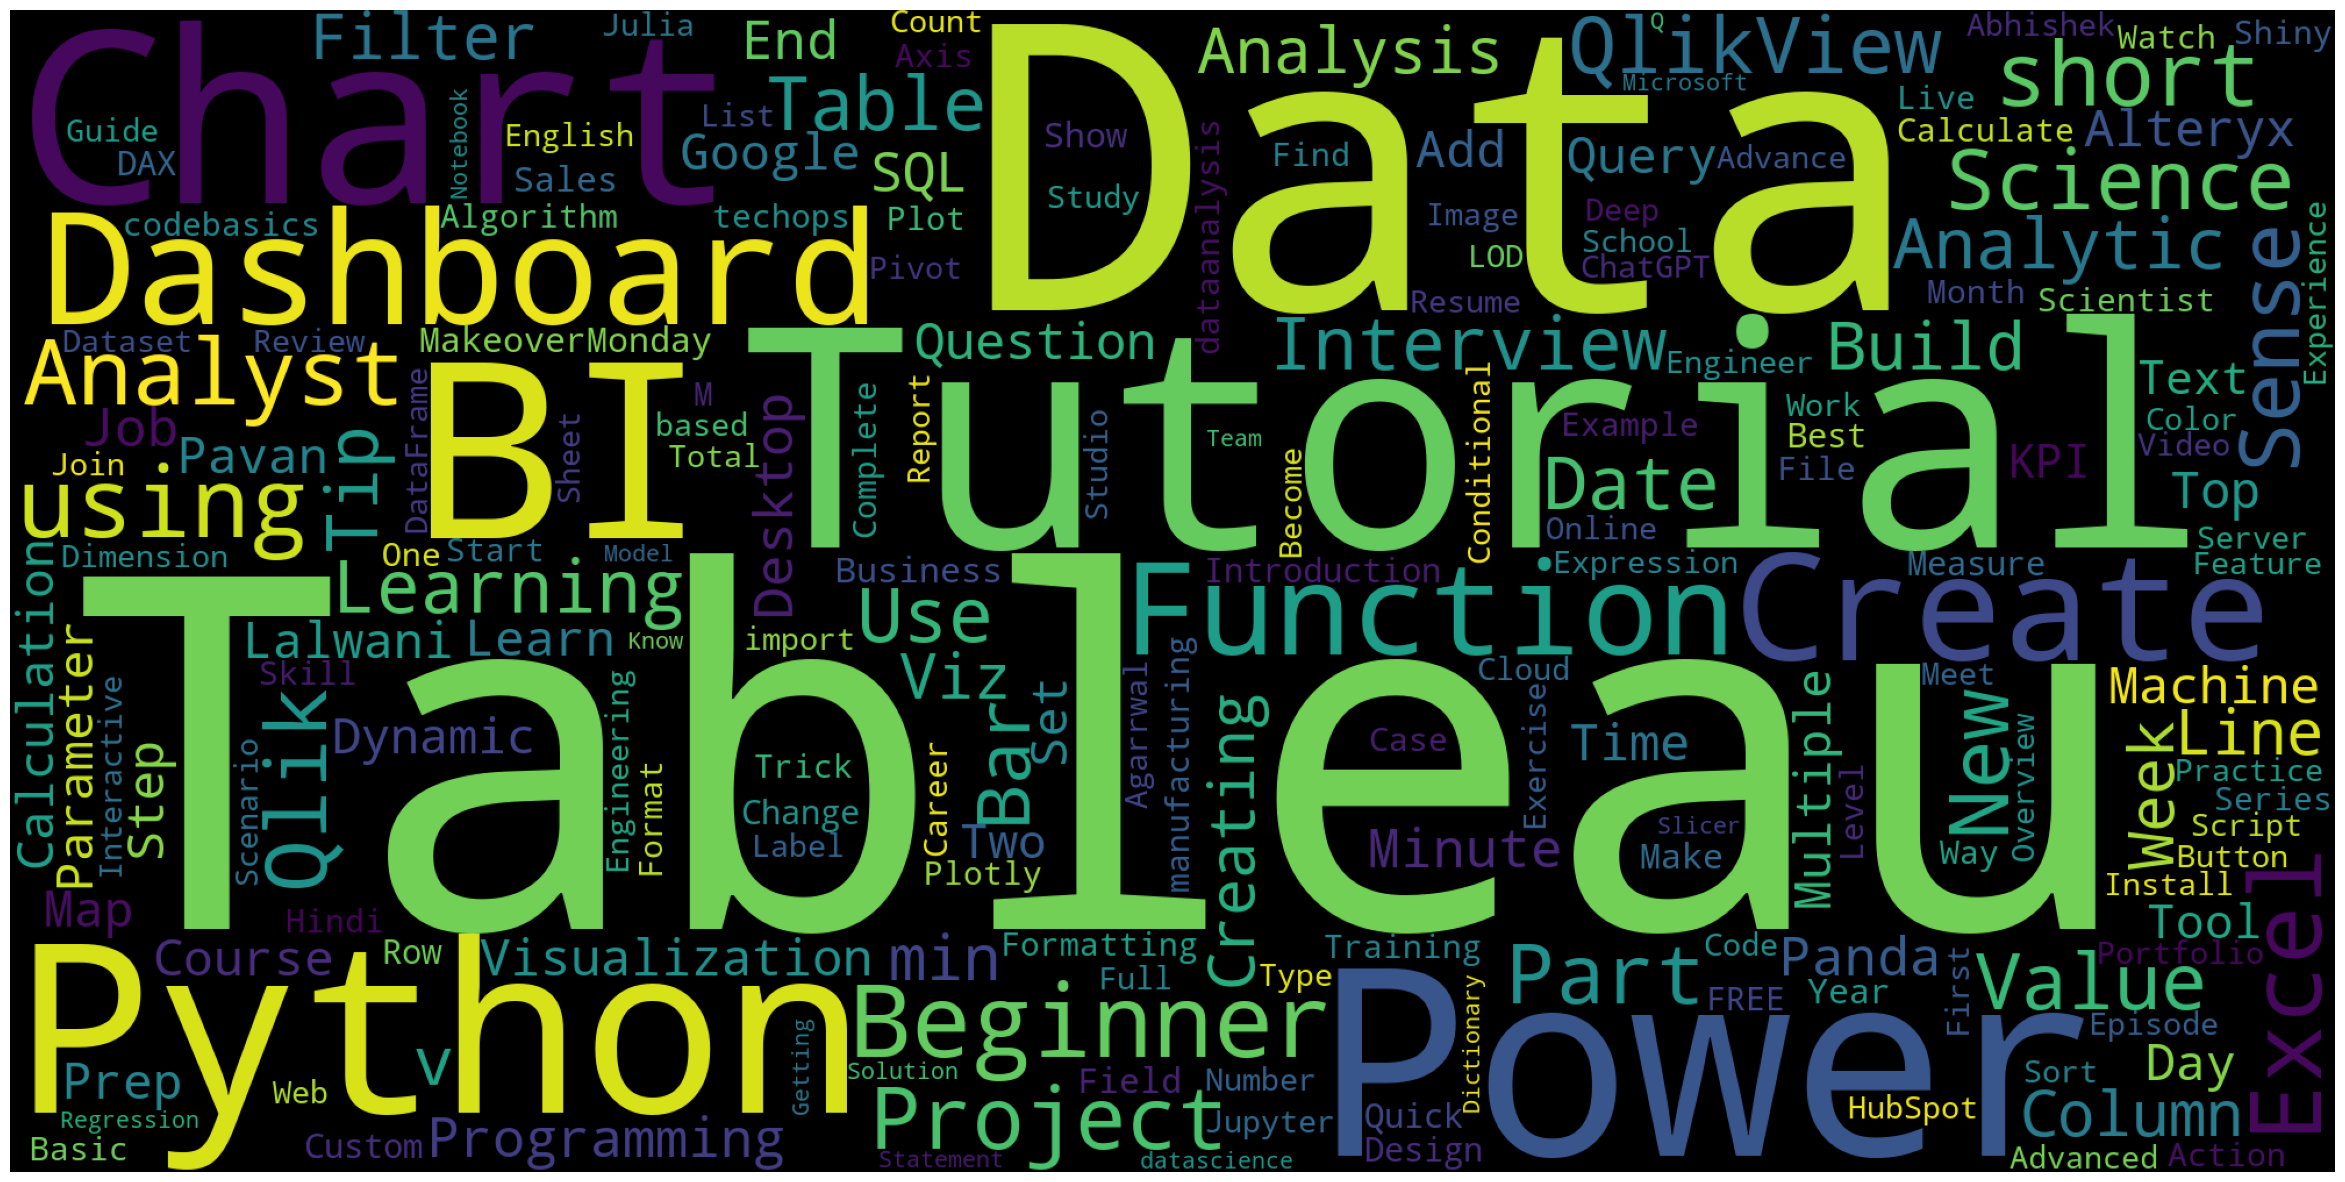

In [25]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off")


wordcloud = WordCloud(
    width=2000,
    height=1000,
    random_state=1,
    background_color="black",
    colormap="viridis",
    collocations=False,
).generate(all_words_str)
plot_cloud(wordcloud)

# Wordcloud for video comments (Video Details: comments_df)

In [26]:
stop_words = set(stopwords.words("english"))
comments_df["comments_no_stopwords"] = comments_df["comments"].apply(
    lambda x: [item for item in str(x).split() if item not in stop_words]
)

all_words = list([a for b in comments_df["comments_no_stopwords"].tolist() for a in b])
all_words_str = " ".join(all_words)

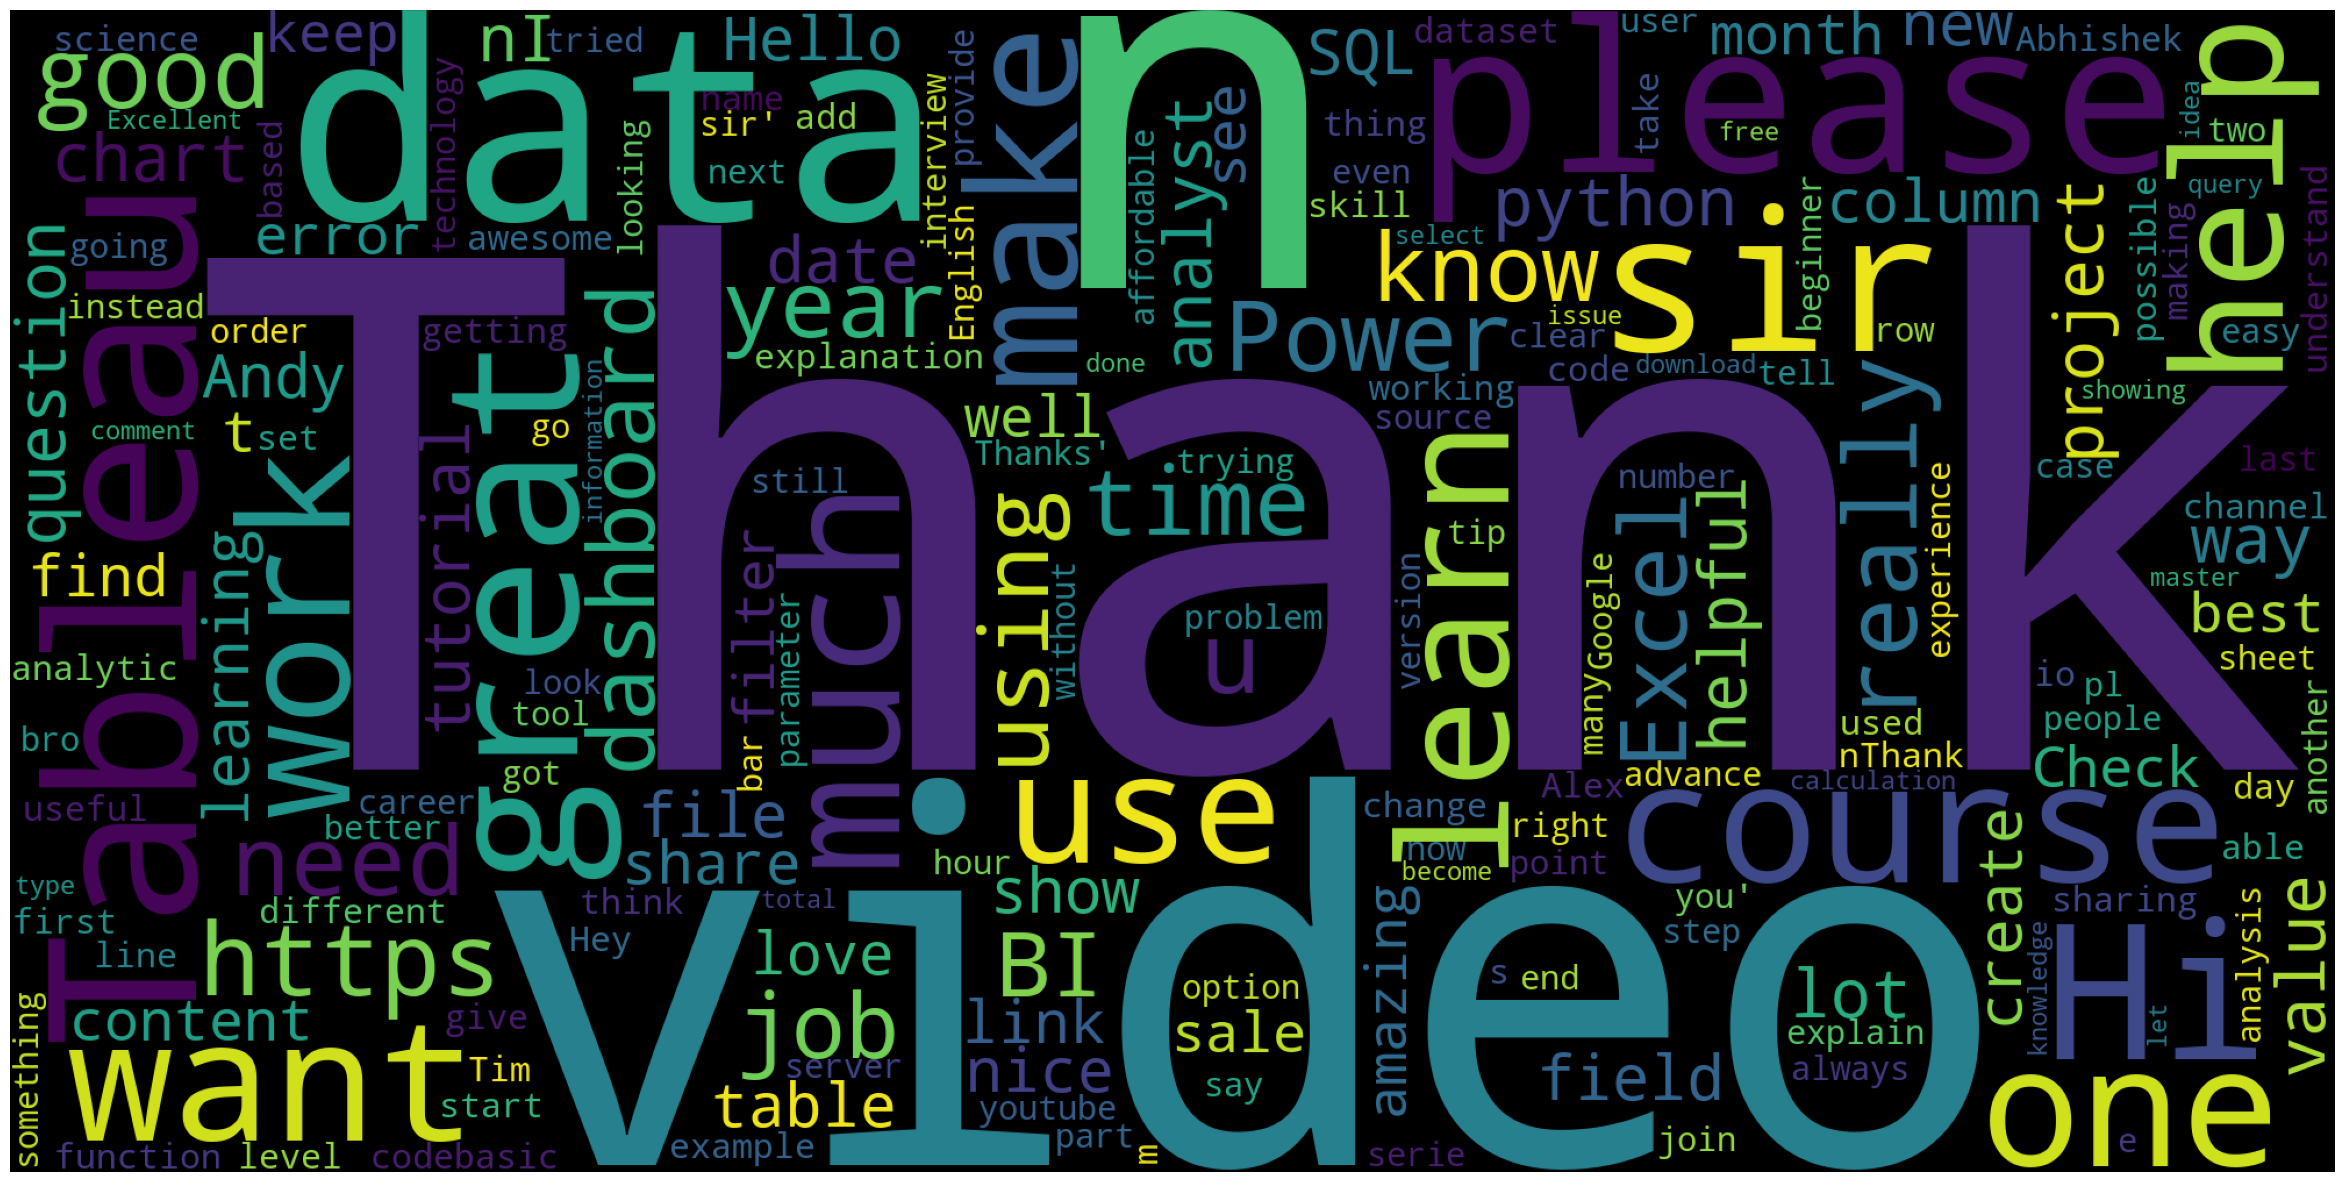

In [27]:
wordcloud = WordCloud(
    width=2000,
    height=1000,
    random_state=1,
    background_color="black",
    colormap="viridis",
    collocations=False,
).generate(all_words_str)
plot_cloud(wordcloud)

We can see what are the frequently-mentioned words in the video comments. I will do this by visualizing the keywords in a wordcloud